# **2. DATA PROFILING**

Import libraries:

In [2]:
!pip install lux-api plotly matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 89.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.0 MB/s eta 0:00:00
  Created wheel for lux-api: filename=lux_api-0.5.1-py3-none-any.whl size=185712 sha256=ab124653b4b9d25e3fb118c50bcdee2bdeff35ad892d3a0b3d2872657f0b3342
  Stored in directory: /root/.cache/pip/wheels/c4/96/d2/ffa7f6c489166338d6d66a644375d56e6d794b780f1bb671ac
  Created wheel for lux-widget: filename=lux_widget-0.1.11-py3-none-any.whl size=2540453 sha256=86b4795aa1efec69939e2aeca6f439b845aacefb165a6f7691467044bdeed929
  Stored in directory: /root/.cache/pip/wheels/e3/52/42/3824e2f5f2d38ee1cb7d3e12ca7734e9

In [3]:
import pandas as pd
import json
import seaborn as sns
import lux
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

**DATA PROFILING**

Data profiling is the set of activities and processes designed to determine the metadata of a given dataset.

Data profiling helps understand and prepare data for subsequent cleansing, integration, and analysis.

Import data:

In [4]:
BEERS = pd.read_csv('https://raw.githubusercontent.com/camillasancricca/DATADIQ/master/BEERS.csv')

Basic profiling activities:

In [ ]:
#look at data with the functions we have already seen in DQ ASSESSMENT
NUM = list(BEERS.select_dtypes(include=['int64', 'float64']).columns)
NUM

['abv', 'ibu', 'id', 'ounces']

In [ ]:
#display numeric columns


In [ ]:
#display categorical columns


**SINGLE COLUMN ANALYSIS**

**Cardinalities**

Cardinalities are numbers that summarize simple metadata (*e.g.,* number of rows, attributes, null values, distinct values, Uniqueness and Distinctness).

*Cardinality* = count of the number of distinct actual values.

*Uniqueness* = percentage calculated as Cardinality divided by the total number of records.

*Actual* = count of the number of records with an actual value (*i.e.,* not-null).

*Distinctness* = percentage calculated as Cardinality divided by Actual.

In [ ]:
#len command counts the number of rows
ROWS = len(BEERS)
ROWS

2419

In [ ]:
#number of rows with shape function


In [ ]:
#number of columns with shape function


In [ ]:
#number of cells with shape function
CELLS = BEERS.size # or BEERS.shape[0]*BEERS.shape[1]
CELLS

In [ ]:
#number of non—null observation in a column (attribute "ibu")
COUNT = BEERS['ibu'].count()
COUNT

np.int64(1412)

In [ ]:
#value counts is the same of a group by (attribute "ibu")
BEERS['ibu'].value_counts()

/usr/local/lib/python3.12/dist-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
#nunique is the number of distict values for an attribute (attribute "ibu")
DISTINCT = BEERS['ibu'].nunique()
DISTINCT

107

UNIQUENESS EVALUATION:

In [ ]:
#for attribute "ibu"
UNIQUENESS = DISTINCT/ROWS

print("UNIQUENESS: ", UNIQUENESS*100)

UNIQUENESS:  4.423315419594874


DISTINCTNESS EVALUATION:

In [ ]:
#for attribute "ibu"
DISTINCTNESS = DISTINCT/COUNT

print("DISTINCTNESS: ", DISTINCTNESS*100)

DISTINCTNESS:  7.577903682719548


**Value distributions**

Value distributions summarize the distribution of values within a column (*e.g.,* extremes and Constancy). A common representation for value distributions are Histograms.

*Constancy* = frequency of the most frequent value divided by the total number of values. It might reveals the presence of standard values.

In [ ]:
#extremes (attribute "abv")
print ('MIN:', BEERS['abv'].min())
print ('MAX:', BEERS['abv'].max())
print ('MEAN', BEERS['abv'].mean())
print ('MODE:', BEERS['abv'].mode())

MIN: 0.027
MAX: 128.0
MEAN 34.63060118795079
MODE: 0    0.05
Name: abv, dtype: float64


In [ ]:
#extremes (all attributes)
print ('MIN: ', BEERS[NUM].min())
print("\n\n")
print ('MAX: ', BEERS[NUM].max())

MIN:  abv       0.027
ibu       4.000
id        1.000
ounces    8.400
dtype: float64



MAX:  abv        128.0
ibu        138.0
id        2692.0
ounces     308.0
dtype: float64


In [ ]:
#other information: Mean and Standard deviation
#print('Average:', )
#print('Standard Deviation:', )

In [ ]:
#find max of value counts (attribute "ibu")
MAX_COUNTS = max(BEERS['ibu'].value_counts())
MAX_COUNTS

82

CONSTANCY EVALUATION:

In [ ]:
#for attribute "ibu"
CONSTANCY = MAX_COUNTS/COUNT
print("CONSTANCY: ", CONSTANCY*100)

CONSTANCY:  5.807365439093484


**Histograms** are often used to fit distributions to the data. Analysts can check if the values of some columns are (approximately) normally distributed, and the number of outliers may be returned.


<Axes: >

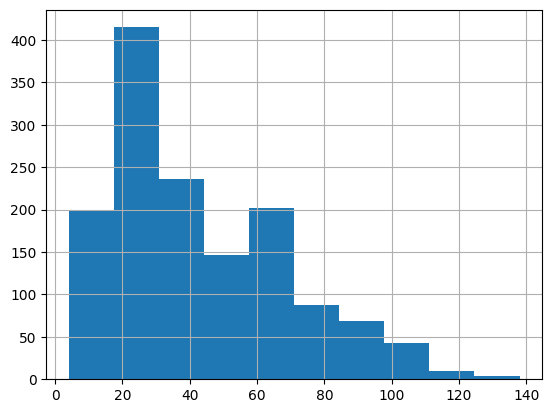

In [5]:
#plot the distribution of the attribute "ibu" with hist function
BEERS['ibu'].hist()

In [6]:
#describe function get different properties for all the numerical attributes of the table
BEERS.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

array([[<Axes: title={'center': 'ibu'}>, <Axes: title={'center': 'abv'}>]],
      dtype=object)

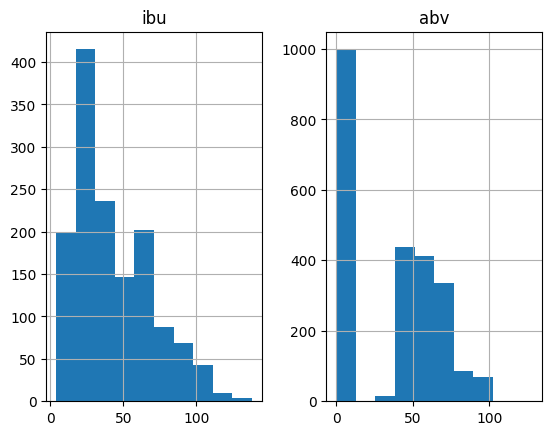

In [7]:
#we can also display multiple histograms
BEERS[['ibu','abv']].hist()

In [9]:
#correlation evaluation base on pearson correlation coefficient
NUM = BEERS.select_dtypes(include = ['int64', 'float64']).columns
BEERS[NUM].corr(method='pearson')  #pearson is the standard one

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [12]:
#correlation evaluation base on kendall correlation coefficient
corr = BEERS[NUM].corr(method='kendall')

In [ ]:
#correlation evaluation base on spearman correlation coefficient


<Axes: >

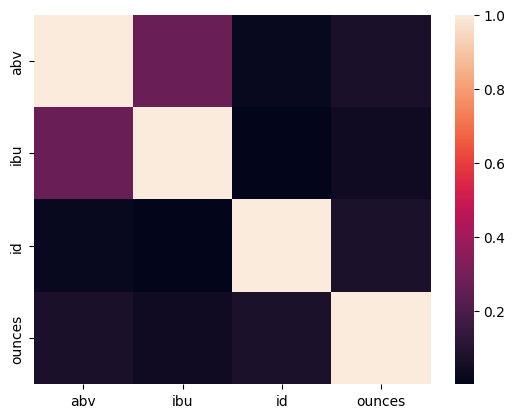

In [13]:
#correlation evaluation heatmap
sns.heatmap(corr)    #1 strictly correlated

**LUX LIBRARY** (alternative library for correlation discovery)

In [14]:
BEERS.default_display = "lux"

In [16]:
BEERS

/usr/local/lib/python3.12/dist-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/usr/local/lib/python3.12/dist-packages/lux/executor/PandasExecutor.py:548: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/usr/local/lib/python3.12/dist-packages/lux/executor/PandasExecutor.py:548: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/usr/local/lib/python3.12/dist-packages/IPython/core/formatters.py:918: UserWarning:
Unexpected error in rendering Lux widget and recommendations. Falling back to Pandas display.
Please report the following issue on Github:

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,66.000,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,71.000,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,75.000,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2414,67.000,45.0,928,Belgorado,Belgian IPA,424,12.0
2415,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2416,55.000,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2417,55.000,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


from matplotlib import pyplot as plt
_df_0['abv'].plot(kind='hist', bins=20, title='abv')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['ibu'].plot(kind='hist', bins=20, title='ibu')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['ounces'].plot(kind='hist', bins=20, title='ounces')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='abv', y='ibu', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='ibu', y='id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='id', y='ounces', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['abv'].plot(kind='line', figsize=(8, 4), title='abv')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['ibu'].plot(kind='line', figsize=(8, 4), title='ibu')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['ounces'].plot(kind='line', figsize=(8, 4), title='ounces')
plt.gca().spines[['top', 'right']].set_visible(False)

**MATPLOTLIB** (very useful library for data visualization)

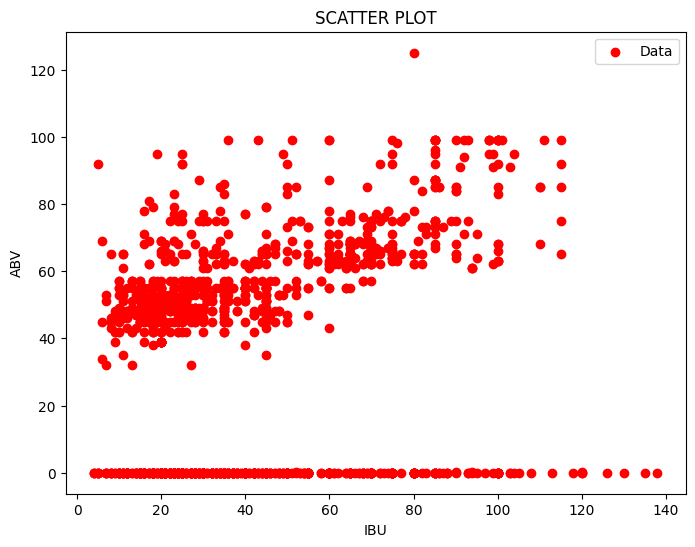

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(BEERS['ibu'], BEERS['abv'], marker='o', color='r', label='Data')
plt.xlabel('IBU')
plt.ylabel('ABV')
plt.title('SCATTER PLOT')
plt.legend()
plt.grid(False)
plt.show()

**PLOTLY** (very useful library for **interactive** data visualization)

In [19]:
df = px.data.iris()
fig = px.scatter_matrix(df,
    dimensions=["sepal_length", "sepal_width", "petal_length", "petal_width"],
    color="species")
fig.show()

In [20]:
df = px.data.tips()
fig = px.box(df, x="time", y="total_bill")
fig.show()

In [21]:
fig = px.box(df, x="time", y="total_bill", points="all")
fig.show()

**Summary:**

*Basic profiling activities*
- pandas.read_csv()
- DataFrame.columns()
- DataFrame.shape()
- DataFrame.head()
- DataFrame.dtypes()
- DataFrame.select_dtypes()

*Single column analysis*
- len()
- DataFrame.count()
- DataFrame.value_counts()
- DataFrame.nunique()
- DataFrame.min(), DataFrame.max(), DataFrame.mean(), DataFrame.std(), DataFrame.mode()

*Histograms*
- DataFrame.describe()
- DataFrame.dropna()
- DataFrame.hist()
- DataFrame.corr()